In [3]:
# packages
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps
from numpy import linalg as la

In [16]:
def PCA(basisNum):
    
    # initializing image array
    zeroImg = []
    
    # looping through all files in att database 
    for i in range(1, 41):
        for j in range(1, 11):
            # detailing file location
            directory = r"C:/Users/genaf/Desktop/Anke's Class/att data/s" + str(i) + '/' + str(j) + ".pgm"
            # opening image and changing data type to floats
            img = ImageOps.grayscale(Image.open(directory))
            vectImg = np.concatenate(np.array(img)).astype(float)
            # nested list
            zeroImg.append(vectImg)
                # calculating the mean of each row
    averages = [sum(zeroImg[i])/len(zeroImg[i]) for i in range(len(zeroImg))]
    
    # subtracting the mean from each column
    meanCentered = [zeroImg[i]-averages[i] for i in range(len(zeroImg))]

    # dataset separation method
    # training = 3 4 5 6 
    # gallery = 7 8 9 10
    # testing = 1 2

    # initializing empty lists to append to later
    testing = []
    training = []
    gallery = []

    # creating counter to loop through all images
    i = 0
    while (i < 400):
        testing.append(meanCentered[i])
        testing.append(meanCentered[i+1])
        training.append(meanCentered[i+2])
        training.append(meanCentered[i+3])    
        training.append(meanCentered[i+4])
        training.append(meanCentered[i+5])
        gallery.append(meanCentered[i+6])
        gallery.append(meanCentered[i+7])
        gallery.append(meanCentered[i+8])
        gallery.append(meanCentered[i+9])
        i += 10      

    # covariance matrix of training data (160 x 160)
    cov = (np.array(training).dot(np.array(training).T))
    
    # initializing empty multidimensional zero array
    sortedEigVect = np.zeros((160, 160))
    
    # using linear algebra package to get eig info
    eigVals, eigVect = la.eig(cov)

    # sorting from greatest to least
    reverse = eigVals[::-1]
    # saving index order for sorting the eig vect
    index = reverse.argsort()

    # applying indices of the correct order to eig vect
    sortedEigVect = [eigVect[i] for i in index]

    # calculating ordered eig vect of correct cov matrix
    E = np.array(training).T @ ((np.array(sortedEigVect)))  

    firstTen = [E[:,i].reshape(112,92) for i in range(10)]
    lastTen = [E[:,i].reshape(112,92) for i in range(150,160)]  
    
    # initializing basis set to be filled
    basis = []
    for i in range(0,basisNum):
        # grabbing each column from E 
        col = E[:,i]
        # and appending to empty basis 
        basis.append(col)

    # projection of testing images based on the basis
    projTesting = 0
    # looping through each image and each eigenface
    for i in range(len(testing)):
        for j in range(len(basis)):
            PC = np.array(basis[j])
            # calculation of projection
            projTesting += np.array(PC).T @ testing[i] * PC

    # projection of gallery images based on the basis
    projGallery = 0
    # looping through each image and each eigenface
    for i in range(len(gallery)):
        for j in range(len(basis)):
            # relabeling as PC
            PC = np.array(basis[j])
            # calculation of projection
            projGallery += np.array(PC).T @ gallery[i] * PC

    # zero weights array
    weightsTest = np.zeros((80,50))
    # looping through each image and each eigenface
    for i in range(int(len(testing))):
        for j in range(len(basis)):
            # relabeling as PC
            PC = np.array(basis[j])
            # calculation of weights
            weightsTest[i][j] =  np.array(PC).T @ (testing[i])

    weightsGall = np.zeros((160,50))
    # looping through each image and each eigenface
    for i in range(int(len(gallery))):
        for j in range(len(basis)):
            # relabeling as PC
            PC = np.array(basis[j])
            # calculation of weights
            weightsGall[i][j] = np.array(PC).T @ (gallery[i])

    # initializing zero distance matrix
    d = np.zeros((80,160))
    # looping through weights of testing and gallery
    # and looping through eigenfaces
    for i in range(len(weightsTest)):
        for j in range(len(weightsGall)):
            for k in range(len(basis)):
                # distance calculation using weights and eigenvalues
                d[i][j] += (1/eigVals[k])*(weightsTest[i][k]-weightsGall[j][k])**2

    # creating iteration counter and empty list          
    counter = 0
    rowIndi = []
    # appending the same number x2, 40 times = 80
    while counter < 40:
        rowIndi.append(counter)
        rowIndi.append(counter)
        counter += 1
        
    counter = 0
    colIndi = []
    # appending the same number x4, 40 times = 160
    while counter < 40:
        colIndi.append(counter)
        colIndi.append(counter)
        colIndi.append(counter)
        colIndi.append(counter)  
        counter += 1
 
    # creating counters for successful pairings
    success = 0
    count = 0
    # looping through each row
    for i in range(len(d)):
        # saving number of individual
        firstIndi = rowIndi[i]
        # calculating minimum in that row
        mini = min(d[i])
        # saving index of that minimum value
        index = list(d[i]).index(mini)
        # saving number of that col individual
        secondIndi = colIndi[index]
        # if individuals match = success
        if firstIndi == secondIndi:
            # add to success count
            success += 1
        count += 1
# uncommented to find five correct and incorrect pairings
#success    print(i, index)
#all    print(i, index) 

    # accuracy out of 80 rows
    acc = success/count
    print('done')
    return acc, firstTen, lastTen, testing, gallery, zeroImg

In [17]:
acc1, firstTen, lastTen, testing, gallery, zeroImg = PCA(5)
acc2, firstTen, lastTen, testing, gallery, zeroImg = PCA(10)
acc3, firstTen, lastTen, testing, gallery, zeroImg = PCA(20)
acc4, firstTen, lastTen, testing, gallery, zeroImg = PCA(30)
acc5, firstTen, lastTen, testing, gallery, zeroImg = PCA(40)
acc6, firstTen, lastTen, testing, gallery, zeroImg = PCA(50)

numCols = [5, 10, 20, 30, 40, 50]
accuracy = [acc1, acc2, acc3, acc4, acc5, acc6]

done
done
done
done
done
done


In [6]:
accuracy

[0.625, 0.6875, 0.7625, 0.7875, 0.825, 0.85]

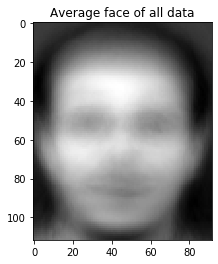

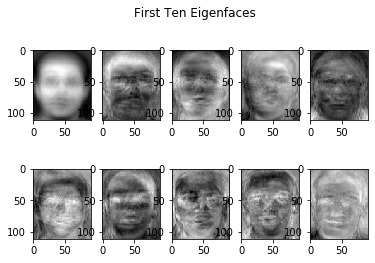

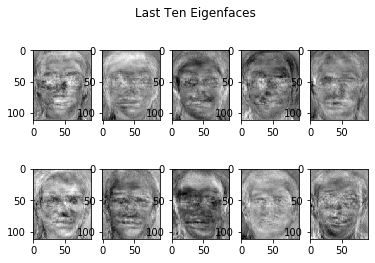

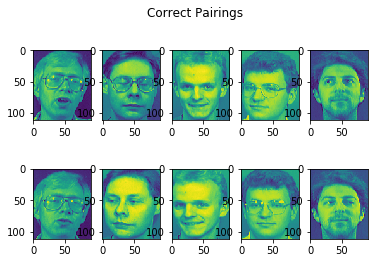

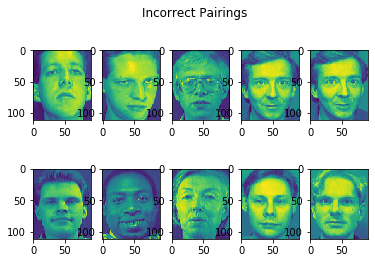

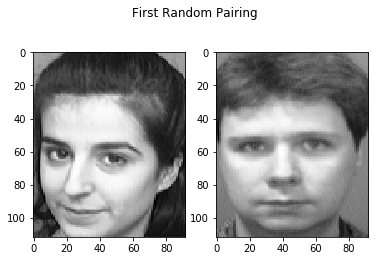

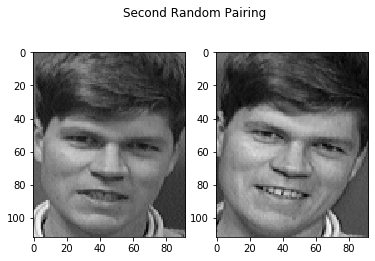

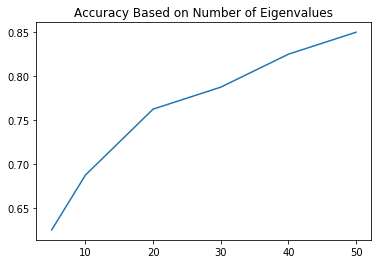

In [13]:
    # calculating the averages of the transpose for plotting
    newZero = (np.array(zeroImg).T)
    newAve = [sum(newZero[i])-len(newZero[i]) for i in range(len(newZero))]
    
    # plotting average face of entire dataset
    plt.imshow(np.array(newAve).T.reshape(112,92), 'gray')
    plt.title('Average face of all data')
    plt.show()
    
    fig, ax = plt.subplots(2,5)
    ax[0][0].imshow(firstTen[0], 'binary')
    ax[0][1].imshow(firstTen[1], 'binary')
    ax[0][2].imshow(firstTen[2], 'binary')
    ax[0][3].imshow(firstTen[3], 'binary')
    ax[0][4].imshow(firstTen[4], 'binary')
    ax[1][0].imshow(firstTen[5], 'binary')
    ax[1][1].imshow(firstTen[6], 'binary')
    ax[1][2].imshow(firstTen[7], 'binary')
    ax[1][3].imshow(firstTen[8], 'binary')
    ax[1][4].imshow(firstTen[9], 'binary')
    
    fig.suptitle('First Ten Eigenfaces')
    plt.show()
    
    fig, ax = plt.subplots(2,5)
    ax[0][0].imshow(lastTen[0], 'binary')
    ax[0][1].imshow(lastTen[1], 'binary')
    ax[0][2].imshow(lastTen[2], 'binary')
    ax[0][3].imshow(lastTen[3], 'binary')
    ax[0][4].imshow(lastTen[4], 'binary')
    ax[1][0].imshow(lastTen[5], 'binary')
    ax[1][1].imshow(lastTen[6], 'binary')
    ax[1][2].imshow(lastTen[7], 'binary')
    ax[1][3].imshow(lastTen[8], 'binary')
    ax[1][4].imshow(lastTen[9], 'binary')

    fig.suptitle('Last Ten Eigenfaces')
    plt.show()
    
    fig, ax = plt.subplots(2,5)

    ax[0][0].imshow(testing[2].reshape(112,92))
    ax[1][0].imshow(gallery[5].reshape(112,92))

    ax[0][1].imshow(testing[6].reshape(112,92))
    ax[1][1].imshow(gallery[13].reshape(112,92))

    ax[0][2].imshow(testing[8].reshape(112,92))
    ax[1][2].imshow(gallery[16].reshape(112,92))

    ax[0][3].imshow(testing[10].reshape(112,92))
    ax[1][3].imshow(gallery[20].reshape(112,92))

    ax[0][4].imshow(testing[12].reshape(112,92))
    ax[1][4].imshow(gallery[26].reshape(112,92))

    fig.suptitle('Correct Pairings')
    plt.show()
    
    fig, ax = plt.subplots(2,5)

    ax[0][0].imshow(testing[0].reshape(112,92))
    ax[1][0].imshow(gallery[143].reshape(112,92))

    ax[0][1].imshow(testing[1].reshape(112,92))
    ax[1][1].imshow(gallery[87].reshape(112,92))

    ax[0][2].imshow(testing[3].reshape(112,92))
    ax[1][2].imshow(gallery[127].reshape(112,92))

    ax[0][3].imshow(testing[4].reshape(112,92))
    ax[1][3].imshow(gallery[14].reshape(112,92))

    ax[0][4].imshow(testing[5].reshape(112,92))
    ax[1][4].imshow(gallery[71].reshape(112,92))

    fig.suptitle('Incorrect Pairings')
    plt.show()
    
    # random numbers
    # used np.random.randint(0,80) to pick
    
    # 18 --> 90 
    # and 
    # 65 --> 131
    
    fig, ax = plt.subplots(1,2)

    ax[0].imshow(testing[18].reshape(112,92), 'gray')
    ax[1].imshow(gallery[90].reshape(112,92), 'gray')

    fig.suptitle('First Random Pairing')
    plt.show()
    
    fig, ax = plt.subplots(1,2)

    ax[0].imshow(testing[65].reshape(112,92), 'gray')
    ax[1].imshow(gallery[131].reshape(112,92), 'gray')

    fig.suptitle('Second Random Pairing')
    plt.show()
    
    plt.plot(numCols, accuracy)
    plt.title('Accuracy Based on Number of Eigenvalues')
    plt.show()

In [11]:
def PCA2(basisNum):
    
    # initializing image array
    zeroImg = []
    
    # looping through all files in att database 
    for i in range(1, 41):
        for j in range(1, 11):
            # detailing file location
            directory = r"C:/Users/genaf/Desktop/Anke's Class/att data/s" + str(i) + '/' + str(j) + ".pgm"
            # opening image and changing data type to floats
            img = ImageOps.grayscale(Image.open(directory))
            vectImg = np.concatenate(np.array(img)).astype(float)
            # nested list
            zeroImg.append(vectImg)
                # subtracting the mean from each column
                    # calculating the mean of each row
    averages = [sum(zeroImg[i])/len(zeroImg[i]) for i in range(len(zeroImg))]
    meanCentered = [zeroImg[i]-averages[i] for i in range(len(zeroImg))]
                  
    # training = 1 2 3 4 
    # gallery = 5 6 7 8
    # testing = 9 10

    # initializing empty lists to append to later
    testing = []
    training = []
    gallery = []

    # creating counter to loop through all images
    i = 0
    while (i < 400):
        testing.append(meanCentered[i+8])
        testing.append(meanCentered[i+9])
        training.append(meanCentered[i])
        training.append(meanCentered[i+1])    
        training.append(meanCentered[i+2])
        training.append(meanCentered[i+3])
        gallery.append(meanCentered[i+4])
        gallery.append(meanCentered[i+5])
        gallery.append(meanCentered[i+6])
        gallery.append(meanCentered[i+7])
        i += 10
    
    # calculating the averages of the transpose for plotting
    newZero = (np.array(zeroImg).T)
    newAve = [sum(newZero[i])-len(newZero[i]) for i in range(len(newZero))]
    
    # plotting average face of entire dataset
    plt.imshow(np.array(newAve).T.reshape(112,92), 'gray')
    plt.title('Average face of all data')
    plt.show()

    # covariance matrix of training data (160 x 160)
    cov = (np.array(training).dot(np.array(training).T))
    
    # initializing empty multidimensional zero array
    sortedEigVect = np.zeros((160, 160))
    
    # using linear algebra package to get eig info
    eigVals, eigVect = la.eig(cov)

    # sorting from greatest to least
    reverse = eigVals[::-1]
    # saving index order for sorting the eig vect
    index = reverse.argsort()

    # applying indices of the correct order to eig vect
    sortedEigVect = [eigVect[i] for i in index]

    # calculating ordered eig vect of correct cov matrix
    E = np.array(training).T.dot((np.array(sortedEigVect)))  

    # initializing basis set to be filled
    basis = []
    for i in range(0,basisNum):
        # grabbing each column from E 
        col = E[:,i]
        # and appending to empty basis 
        basis.append(col)

    # projection of testing images based on the basis
    projTesting = 0
    # looping through each image and each eigenface
    for i in range(len(testing)):
        for j in range(len(basis)):
            PC = np.array(basis[j])
            # calculation of projection
            projTesting += np.array(PC).T @ testing[i] * PC

    # projection of gallery images based on the basis
    projGallery = 0
    # looping through each image and each eigenface
    for i in range(len(gallery)):
        for j in range(len(basis)):
            # relabeling as PC
            PC = np.array(basis[j])
            # calculation of projection
            projGallery += np.array(PC).T @ gallery[i] * PC

    # zero weights array
    weightsTest = np.zeros((80,50))
    # looping through each image and each eigenface
    for i in range(int(len(testing))):
        for j in range(len(basis)):
            # relabeling as PC
            PC = np.array(basis[j])
            # calculation of weights
            weightsTest[i][j] =  np.array(PC).T @ (testing[i])

    weightsGall = np.zeros((160,50))
    # looping through each image and each eigenface
    for i in range(int(len(gallery))):
        for j in range(len(basis)):
            # relabeling as PC
            PC = np.array(basis[j])
            # calculation of weights
            weightsGall[i][j] = np.array(PC).T @ (gallery[i])

    # initializing zero distance matrix
    d = np.zeros((80,160))
    # looping through weights of testing and gallery
    # and looping through eigenfaces
    for i in range(len(weightsTest)):
        for j in range(len(weightsGall)):
            for k in range(len(basis)):
                # distance calculation using weights and eigenvalues
                d[i][j] += (1/eigVals[k])*(weightsTest[i][k]-weightsGall[j][k])**2

    # creating iteration counter and empty list          
    counter = 0
    rowIndi = []
    # appending the same number x2, 40 times = 80
    while counter < 40:
        rowIndi.append(counter)
        rowIndi.append(counter)
        counter += 1
        
    counter = 0
    colIndi = []
    # appending the same number x4, 40 times = 160
    while counter < 40:
        colIndi.append(counter)
        colIndi.append(counter)
        colIndi.append(counter)
        colIndi.append(counter)  
        counter += 1
 
    # creating counters for successful pairings
    success = 0
    count = 0
    # looping through each row
    for i in range(len(d)):
        # saving number of individual
        firstIndi = rowIndi[i]
        # calculating minimum in that row
        mini = min(d[i])
        # saving index of that minimum value
        index = list(d[i]).index(mini)
        # saving number of that col individual
        secondIndi = colIndi[index]
        # if individuals match = success
        if firstIndi == secondIndi:
            # add to success count
            success += 1
        count += 1
# uncommented to find five correct and incorrect pairings
#success    print(i, index)
#all    print(i, index) 

    # accuracy out of 80 rows
    acc = success/count
    return acc, testing, gallery, E, zeroImg

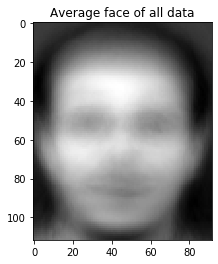

0.825

In [12]:
accStep15, testing, gallery, E, zeroImg = PCA2(50)
accStep15

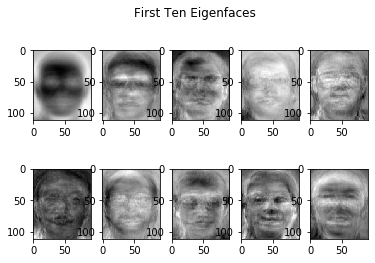

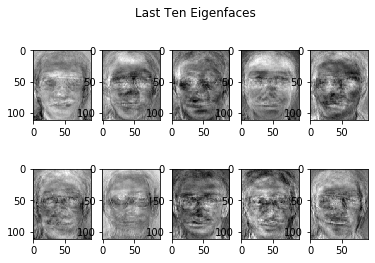

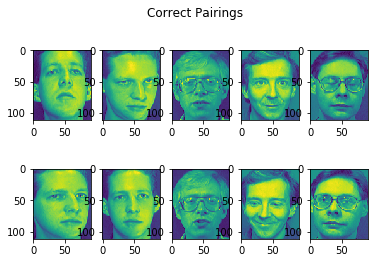

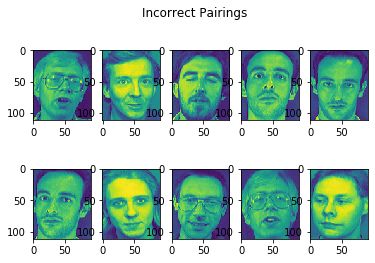

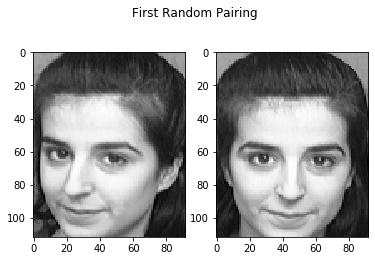

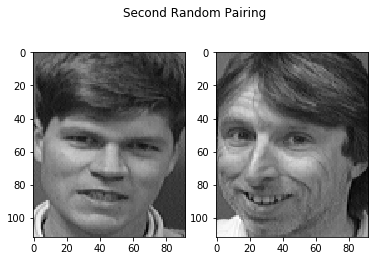

In [98]:
firstTen15 = [E[:,i].reshape(112,92) for i in range(10)]
lastTen15 = [E[:,i].reshape(112,92) for i in range(150,160)]

fig, ax = plt.subplots(2,5)

ax[0][0].imshow(firstTen15[0], 'binary')
ax[0][1].imshow(firstTen15[1], 'binary')
ax[0][2].imshow(firstTen15[2], 'binary')
ax[0][3].imshow(firstTen15[3], 'binary')
ax[0][4].imshow(firstTen15[4], 'binary')
ax[1][0].imshow(firstTen15[5], 'binary')
ax[1][1].imshow(firstTen15[6], 'binary')
ax[1][2].imshow(firstTen15[7], 'binary')
ax[1][3].imshow(firstTen15[8], 'binary')
ax[1][4].imshow(firstTen15[9], 'binary')

fig.suptitle('First Ten Eigenfaces')
plt.show()

fig, ax = plt.subplots(2,5)

ax[0][0].imshow(lastTen15[0], 'binary')
ax[0][1].imshow(lastTen15[1], 'binary')
ax[0][2].imshow(lastTen15[2], 'binary')
ax[0][3].imshow(lastTen15[3], 'binary')
ax[0][4].imshow(lastTen15[4], 'binary')
ax[1][0].imshow(lastTen15[5], 'binary')
ax[1][1].imshow(lastTen15[6], 'binary')
ax[1][2].imshow(lastTen15[7], 'binary')
ax[1][3].imshow(lastTen15[8], 'binary')
ax[1][4].imshow(lastTen15[9], 'binary')

fig.suptitle('Last Ten Eigenfaces')
plt.show()

fig, ax = plt.subplots(2,5)

ax[0][0].imshow(testing[0].reshape(112,92))
ax[1][0].imshow(gallery[0].reshape(112,92))

ax[0][1].imshow(testing[1].reshape(112,92))
ax[1][1].imshow(gallery[3].reshape(112,92))

ax[0][2].imshow(testing[3].reshape(112,92))
ax[1][2].imshow(gallery[7].reshape(112,92))

ax[0][3].imshow(testing[4].reshape(112,92))
ax[1][3].imshow(gallery[11].reshape(112,92))

ax[0][4].imshow(testing[6].reshape(112,92))
ax[1][4].imshow(gallery[15].reshape(112,92))

fig.suptitle('Correct Pairings')
plt.show()

fig, ax = plt.subplots(2,5)

ax[0][0].imshow(testing[2].reshape(112,92))
ax[1][0].imshow(gallery[63].reshape(112,92))

ax[0][1].imshow(testing[5].reshape(112,92))
ax[1][1].imshow(gallery[45].reshape(112,92))

ax[0][2].imshow(testing[20].reshape(112,92))
ax[1][2].imshow(gallery[107].reshape(112,92))

ax[0][3].imshow(testing[30].reshape(112,92))
ax[1][3].imshow(gallery[4].reshape(112,92))

ax[0][4].imshow(testing[31].reshape(112,92))
ax[1][4].imshow(gallery[13].reshape(112,92))

fig.suptitle('Incorrect Pairings')
plt.show()

# same random numbers
# 18 --> 39 
# and 
# 65 --> 153

fig, ax = plt.subplots(1,2)

ax[0].imshow(testing[18].reshape(112,92), 'gray')
ax[1].imshow(gallery[39].reshape(112,92), 'gray')

fig.suptitle('First Random Pairing')
plt.show()

fig, ax = plt.subplots(1,2)

ax[0].imshow(testing[65].reshape(112,92), 'gray')
ax[1].imshow(gallery[153].reshape(112,92), 'gray')

fig.suptitle('Second Random Pairing')
plt.show()